# Linear Regression on Hardware Data
This notebook demonstrates how to generate synthetic hardware data and apply linear regression to predict power consumption based on multiple hardware metrics.

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
data = pd.read_csv('hardware_info.csv')

## Split the Data
We will split the data into training and testing sets.

In [3]:

# Split the data into training and testing sets
X = data[['CPU_Usage', 'RAM_Usage', 'Disk_IO', 'Network_In', 'Network_Out', 'Temperature', 'Fan_Speed', 'Voltage']]
y = data['Power_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 8), (200, 8), (800,), (200,))

## Train the Linear Regression Model
We will create and train a linear regression model using the training data.

In [4]:

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


Intercept: 30.958724204779855
Coefficients: [1.4914861  0.50889614 0.00999507 0.01978859 0.0195227  0.48699029
 0.01013422 9.66216749]


## Make Predictions
We will use the trained model to make predictions on the test data.

In [5]:

# Make predictions
y_pred = model.predict(X_test)

# Display the first few predictions
y_pred[:5]


array([212.50365706, 228.21066584, 241.35037942, 191.92197536,
       232.80909906])

## Plot the Results
We will plot the actual vs predicted power consumption values.

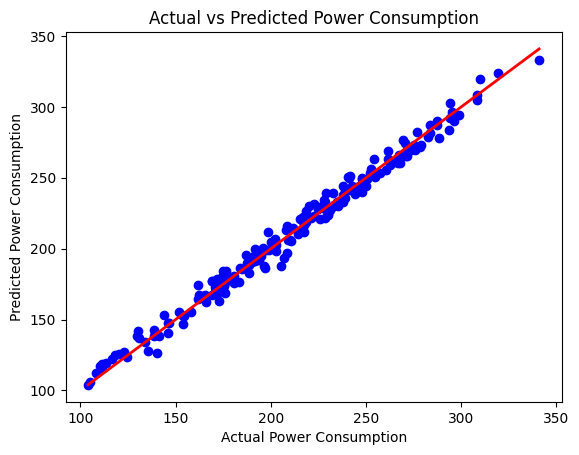

In [6]:

# Plot the results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.show()


## Evaluate the Model
We will evaluate the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), R-squared (R²) score, and Adjusted R-squared.

In [7]:

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}%')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')


Mean Absolute Error: 4.403836614140018
Mean Squared Error: 30.194636637892152
Root Mean Squared Error: 5.494964662114958
Mean Absolute Percentage Error: 2.230097935779841%
R-squared: 0.9879578094650721
Adjusted R-squared: 0.9874534245212008


## Heatmap
We will plot a heatmap to visualize the correlation between features.

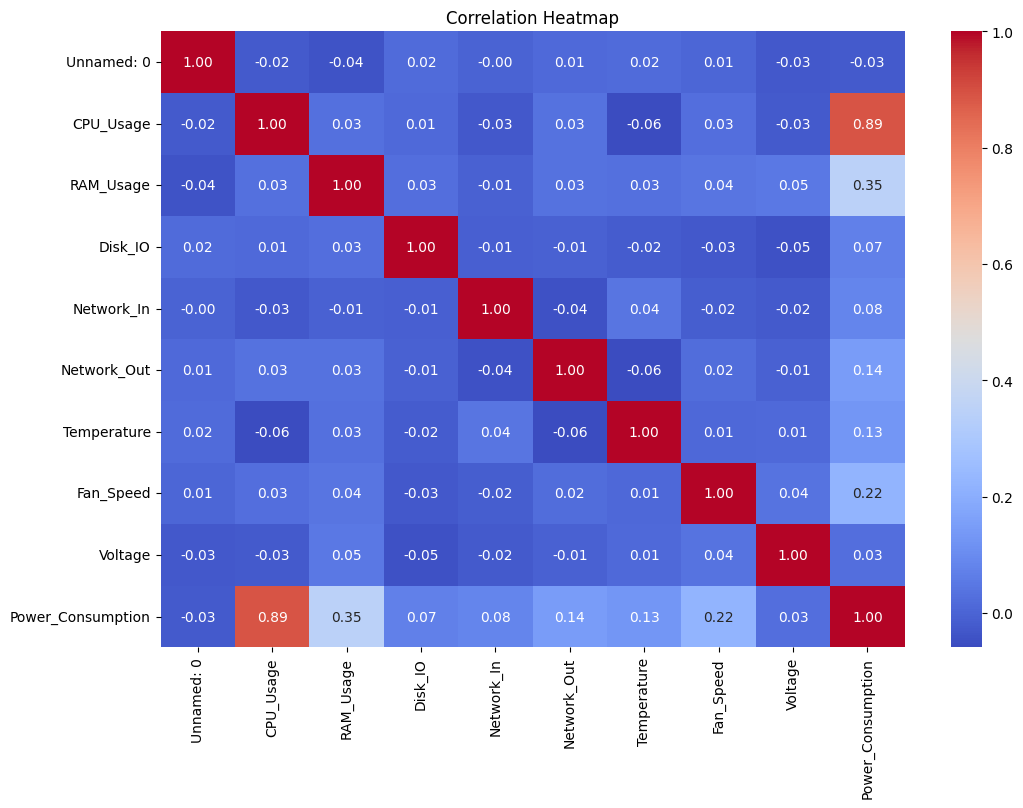

In [8]:

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Correlation Matrix
We will display the correlation matrix.

In [9]:

# Correlation Matrix
corr_matrix = data.corr()
print(corr_matrix)


                   Unnamed: 0  CPU_Usage  RAM_Usage   Disk_IO  Network_In  \
Unnamed: 0           1.000000  -0.024495  -0.038855  0.015767   -0.003548   
CPU_Usage           -0.024495   1.000000   0.029310  0.014518   -0.029424   
RAM_Usage           -0.038855   0.029310   1.000000  0.027262   -0.005791   
Disk_IO              0.015767   0.014518   0.027262  1.000000   -0.013560   
Network_In          -0.003548  -0.029424  -0.005791 -0.013560    1.000000   
Network_Out          0.013645   0.034785   0.032911 -0.008858   -0.044812   
Temperature          0.016340  -0.059440   0.029994 -0.020353    0.039959   
Fan_Speed            0.006027   0.027269   0.042327 -0.028299   -0.017133   
Voltage             -0.028854  -0.025491   0.049960 -0.046775   -0.022849   
Power_Consumption   -0.025823   0.890753   0.348976  0.071248    0.081623   

                   Network_Out  Temperature  Fan_Speed   Voltage  \
Unnamed: 0            0.013645     0.016340   0.006027 -0.028854   
CPU_Usage       